In this notebook, we will do the EDA (Exploratory Data Analysis) by modules in Python.

# 1. Importing The Data

In [24]:
import pandas as pd
%config Completer.use_jedi = False

order_df = pd.read_csv("order.csv")

In [25]:
order_df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


In [26]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


From the data info above, there are 49999 data entries with 12 features. It is also can be seen that there is no missing value from the data itself.

# 2. Descriptive Statistics

Here is the descriptive statistics from each series of data having numeric type.

In [27]:
order_df.describe()

,quantity,price,freight_value,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49980.000000
mean,1.197484,2.607784e+06,104521.390428,2201.830892
std,0.722262,1.388312e+06,55179.844962,3929.896875
min,1.000000,2.000000e+05,9000.000000,50.000000
25%,1.000000,1.410500e+06,57000.000000,300.000000
50%,1.000000,2.610000e+06,104000.000000,800.000000
75%,1.000000,3.810000e+06,152000.000000,1850.000000
max,21.000000,5.000000e+06,200000.000000,40425.000000


# 3. Data Histogram
From the histogram, we can assume the outlying data distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E66BF579C8>]],
      dtype=object)

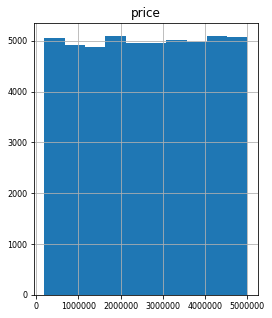

In [28]:
import matplotlib.pyplot as plt
order_df[["price"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)

From the histogram plot above, it looks like that the "price" has uniform distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E66A148708>]],
      dtype=object)

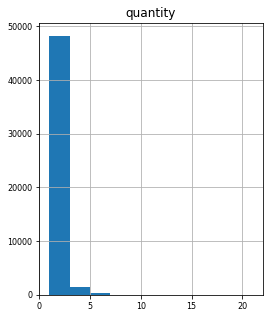

In [29]:
order_df[["quantity"]].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)

In the other hands, there is skew in "quantity" distribution.

# 4. Grouping and Sorting
## 4.1. Grouping
Like pivoting in MS Excel, we also can group the data based on several features, and takes such as the mean, median or mode.

In [30]:
order_df["price"].groupby(order_df["payment_type"]).mean()

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64

In [31]:
order_df.groupby(["payment_type"]).mean()

,quantity,price,freight_value,product_weight_gram
payment_type,,,,
credit card,1.195071,2.600706e+06,104956.633061,2206.795709
debit card,1.200770,2.611974e+06,104412.764593,2175.638187
e-wallet,1.195774,2.598562e+06,103978.470437,2236.892157
virtual account,1.198315,2.619786e+06,104733.884429,2188.170761


## 4.2. Sorting

In [32]:
order_df.sort_values(by="price", ascending=False)

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
37085,d7b2d3b902441cf3dd12cd125533217d,1,35afc973633aaeb6b877ff57b2793310,5000000,4a3ca9315b744ce9f8e9374361493884,118000,217344c7c334e16c8e76551b4b240c1d,delivered,2017-10-31,debit card,beauty,1825.0
41958,2711089c7fec59d4dc8483e3c6a12fa3,1,7c1bd920dbdf22470b68bde975dd3ccf,5000000,cc419e0650a3c5ba77189a1882b7556a,31000,0ef59d9bb071def3dbf7e7b055965e95,delivered,2017-11-24,e-wallet,fashion,200.0
3976,f343624eab419250ad81f1ce6be22c93,1,777d2e438a1b645f3aec9bd57e92672c,5000000,4a3ca9315b744ce9f8e9374361493884,101000,3fc0d940852ab274e532e80b1c1d5c2f,delivered,2017-03-07,debit card,gadget,950.0
21072,c8947a583ab9791a5a9d02384cb84302,1,f8cfb63e323be2e1c4172f255d61843d,5000000,4a3ca9315b744ce9f8e9374361493884,184000,57c047e791e69bef0af220b0a165a22d,delivered,2017-07-27,credit card,beauty,550.0
47074,f6134169ca6f0cdfbe6458ebb5731613,1,2ea92fab7565c4fe9f91a5e4e1756258,5000000,3d871de0142ce09b7081e2b9d1733cb1,196000,cbfdcc896d6ebc83c21fdcf4f4762efc,delivered,2017-12-04,virtual account,gadget,10600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33786,0d9e86e02c1a823b20c03ea29d616607,1,f93213a23c50edc16c27b96333f734dc,200000,46dc3b2cc0980fb8ec44634e21d2718e,141000,edaad9e07395713e9f5a2124f6c846a1,delivered,2017-10-13,debit card,automotive,7550.0
42166,54220fcc516cabe9ec84b210c0765ef2,1,1166bc797ddf5fb009c376d133f61204,200000,5cbbd5a299cab112b7bf23862255e43e,175000,24e7dc2ff8c07126358af519732b8558,delivered,2017-11-24,e-wallet,gadget,1100.0
31745,59a19c83ff825948739dd1601cc107b6,1,eb38a7604070a2b8465101ed53cba72b,200000,e6a69c4a27dfdd98ffe5aa757ad744bc,112000,2bf857ee40b763708fe19cf877cac511,delivered,2017-10-01,e-wallet,beauty,550.0
42452,9960ee97c2f8d801a200a01893b3942f,1,db5efde3ad0cc579b130d71c4b2db522,200000,4869f7a5dfa277a7dca6462dcf3b52b2,26000,54af40597a8931fea3fbb2b37656fc8d,delivered,2017-11-24,credit card,automotive,6663.0
